# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [3]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline
plt.style.use('ggplot')

### Step 2: Read in your data set

In [4]:
# read in data from source
df_raw = pd.read_csv("../../dataset/admissions.csv")
print df_raw.head()

df_raw.head(5)

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset?


In [6]:
# print df_raw.columns
print df_raw.count()

#returns row count
print df_raw.shape[0]
print len(df_raw.index)

admit       400
gre         398
gpa         398
prestige    399
dtype: int64
400
400


Answer: both ```df_raw.shape[0]``` and ```len(df_raw.index)``` shows there are 400 rows (also could simply do ```df_raw``` but these take less space), which means there are 400 observations. Using ```df_raw.count``` could be misleading in some cases as it only returns the count of non-NaN rows

#### Question 2. Create a summary table.

In [7]:
# function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The GRE is scored on a range much larger than GPA (a 800 pt scale vs a 4 point scale). Which means the difference between any observation and the mean for GRE is going to have a larger magnitude than the difference between any observation and the mean for GPA, so therefore the standard deviation is larger.

On a more qualatative level GPA takes into account many other factors, such as class participation, extra credit, etc and I think these may act to reduce the standard deviation — my logic being if someone performs poorly on a test, they will put in extra effort through these other means. Also grades used in GPA are often on a "curve" so to speak which again helps to reduce wildly different scores amongst students. Whereas the GRE is a much more fixed score (though you can retake the test, only limited times I believe).

#### Question 4. Drop data points with missing data.


In [8]:
# print df_raw.admit.isnull().sum()
# print df_raw.gre.isnull().sum()
# print df_raw.gpa.isnull().sum()
# print df_raw.prestige.isnull().sum()

df_new = df_raw.dropna() #is it bad practice to drop the missing data from the entire dataframe rather than by each column?
print len(df_new)


397


In [15]:
#double-checking work
print df_new.count()
print df_new.isnull().sum()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64
admit       0
gre         0
gpa         0
prestige    0
dtype: int64


In [10]:
#get rows which are NOT in new dataframe to double check work
df_raw[~df_raw.isin(df_new)].dropna(how = 'all')

,admit,gre,gpa,prestige
187,0.0,NaN,NaN,2.0
212,0.0,NaN,2.87,2.0
236,1.0,660.0,NaN,NaN


#### Question 5. Confirm that you dropped the correct data.  How can you tell?

Answer: using ```df_new.count()``` shows there are now 397 observations meaning we dropped 3 rows from the original 400. ```df_new.isnull().sum()``` shows that after the drop, there are now zero NaN entries. Also from a little bit of researching I found ```df_raw[~df_raw.isin(df_new)].dropna(how = 'all')``` which gives the rows in df_raw that are not df_new (I basically just wanted to show which rows specifically were dropped with ```.dropna``` maybe there's a better way to do this but this seemed to work). Both of these confirm the correct data was dropped.

#### Question 6. Create box plots for GRE and GPA.

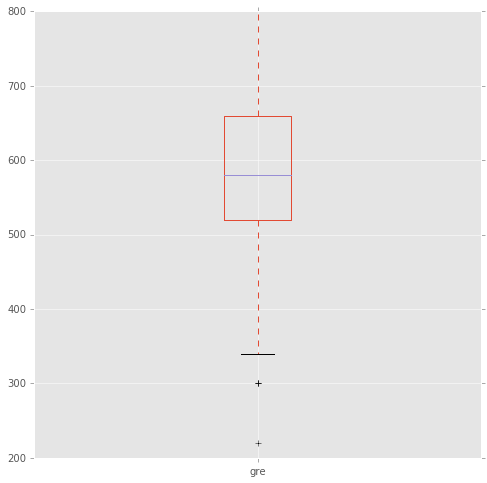

In [95]:
# boxplot 1
df_new.gre.plot(kind = 'box', figsize = (8, 8))

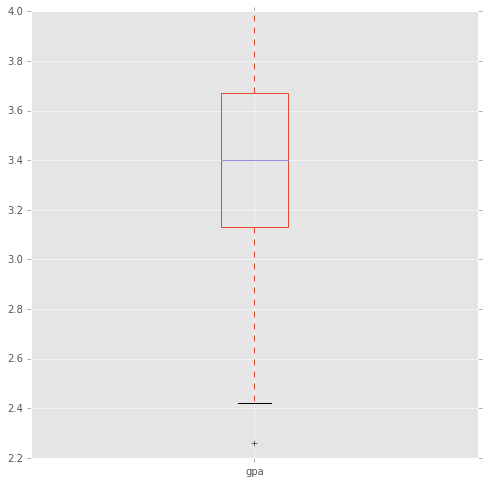

In [96]:
# boxplot 2
df_new.gpa.plot(kind = 'box', figsize = (8, 8))

#### Question 7. What do this plots show?

Answer: Basically they give an overview of the spread, median, and outliers of GRE and GPA scores. 

The boxplot for GRE scores shows that 50% (25%–75%) of the data is between 520—660. The lower 25% of the data is roughly between 340–520 and the upper 25% of the data is between 660–800. The median is 580. There are two outliers at 300 and 220, which fall more than 1.5 times below the interquartile range (the middle 50% of the data). The box portion is uneven, with the height of Q1 to Q2 being shorter than that of Q2 to Q3 which means the scores between Q1 and Q2 are less spread than between Q2 and Q3.

The boxplot for GPA scores shows that 50% (25%–75%) of the data is between 3.13—3.67. The lower 25% of the data is roughly between 2.41–3.13 and the upper 25% of the data is between 3.67–4.00. The median is 3.95. There is one outliers at 2.26, which fall more than 1.5 times below the interquartile range (the middle 50% of the data). The box portion is even, which means the spread between Q1 and Q2 is similar to that of between Q2 and Q3.

#### Question 8. Describe each distribution.

In [97]:
# plot the distribution of each variable
# df_new[ ['admit', 'gre', 'gpa', 'prestige'] ].plot(kind = 'hist', figsize = (8, 8))

0.787669147851


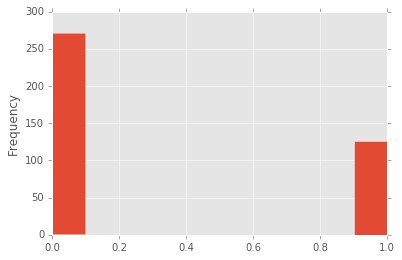

In [112]:
# distribution for admit
df_new.admit.plot.hist()

# skew
print df_new['admit'].skew()

-0.146046988216


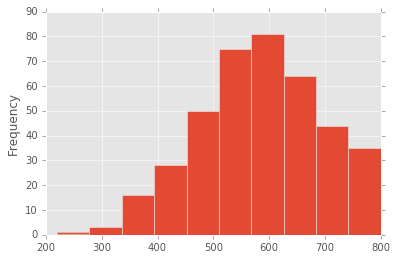

In [111]:
# distribution for gre
df_new.gre.plot.hist()

# skew
print df_new['gre'].skew()

-0.216888932969


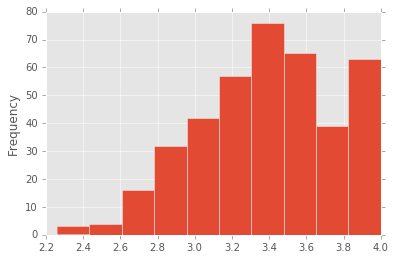

In [110]:
# distribution for gpa
df_new.gpa.plot.hist()

# skew
print df_new['gpa'].skew()

0.0865055528971


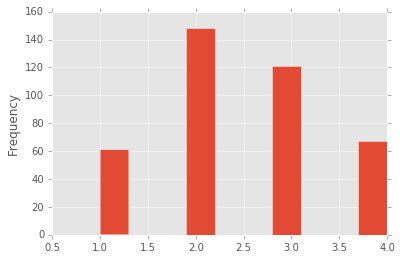

In [113]:
# distribution for prestige
df_new.prestige.plot.hist()

# skew
print df_new['prestige'].skew()

#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

Answer: GRE, GPA, and Prestige are all roughly a normal distrubtion, however all the distributions are slightly skewed. I think GRE is the most close to a normal distribution, but is a bit asymmetrical. Distributions for variables GRE and GPA are similar, with the exception that far right (high scores) are lower for GRE scores (which is likely due to GPA having more factors involved such as participation, extra credit, etc where as GRE are solely based on test scores). The distribution of Prestige is similar to GRE which makes sense considering schools with higher prestige probably required higher SAT scores, so individuals who get into higher prestige undergraduate schools may be better at taking standardized tests like the GRE. 

To sum up — I think the distributions need to undergo some adjustments to meet the requirement of a normal distribution. 

#### Question 10. Does this distribution need correction?  If so, why?  How?

Answer: Yes the distributions need correction because otherwise the accurancy of the model will use may be compromised. I think removing outliers and having a larger sample size would help have a more normal distribution. Additionally, a log transformation of the data can help reduce the skew.

#### Question 11. Which of our variables are potentially colinear?

In [104]:
# create a correlation matrix for the data
df_new.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Looks like GRE and GPA are colinear in regards to Admit because both values (0.18 for GRE and 0.17 for GPA) are close to one another. However, neither GRE, GPA, or Prestige appear to correlate very much to Admit. In fact, it's interesting that Prestige is negative. This seems to imply that the higher ratings of prestige for undergraduate schools make it less likely to be admitted to law school, which is very countintuitive. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Answer: To explore the association between grad school admission rates and prestige of undergraduate schools, I would continue as I've done above and further plot the data in different ways. From there I would try something like a OLS Regression and analyze the results further to disprove my hypothesis. 

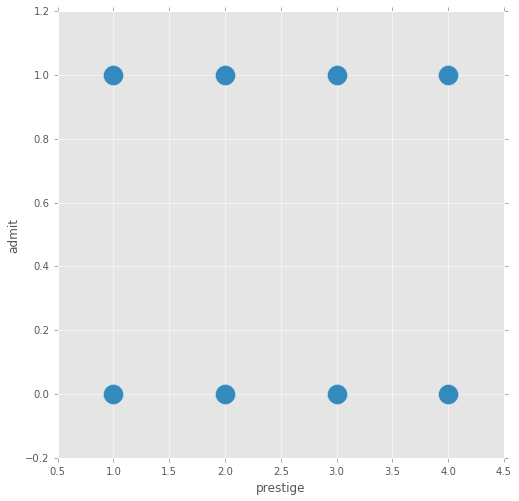

In [22]:
#For example 
df_new.plot(kind = 'scatter', x = 'prestige', y = 'admit', s = 400, figsize = (8, 8))

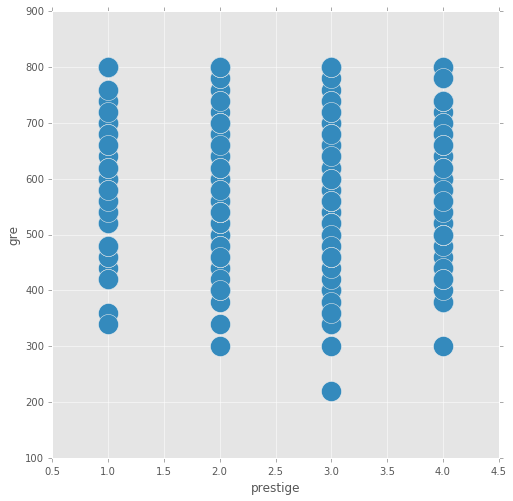

In [23]:
df_new.plot(kind = 'scatter', x = 'prestige', y = 'gre', s = 400, figsize = (8, 8))

#### Question 14. What is your hypothesis?

Answer: Prestige is not a predictor of grad school admission.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data.

#### 2. Bonus: Log transform the skewed data.

In [13]:
# related question... is reducing skew = normalizing data?"

#### 3. Advanced: Impute missing data.